# Clustering Of College data

problem statement :

Use cluster analysis to identify the groups of characteristically similar schools in the College Scorecard dataset
dataset link :
    https://www.google.com/url?q=https://data.world/exercises/cluster-analysis-exercise-2%23__sid%3Djs0&sa=D&source=hangouts&ust=1582440423834000&usg=AFQjCNHB_33vQSX2xjXPAGxPY-tfipymFA

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing job-lib
import joblib

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/clustering/lib_and_dataset/')
from ipynb.fs.full.my_custom_library import *

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
# loading csv data from the file given in the url
data_set = pd.read_csv("/home/admin3/Documents/MyDoc/data_sets/exercises-cluster-analysis-exercise-2/CollegeScorecard.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Columns: 1725 entries, UNITID to NOTFIRSTGEN_RPY_3YR_RT_SUPP
dtypes: float64(1539), int64(12), object(174)
memory usage: 102.7+ MB


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Data - preprocessing 

###### Taking only 5 relevant columns

In [2]:
data_set.columns

Index(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'AccredAgency', 'INSTURL', 'NPCURL',
       ...
       'COMPL_RPY_3YR_RT_SUPP', 'NONCOM_RPY_3YR_RT_SUPP',
       'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP', 'PELL_RPY_3YR_RT_SUPP',
       'NOPELL_RPY_3YR_RT_SUPP', 'FEMALE_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP'],
      dtype='object', length=1725)

In [3]:
data_set=data_set.loc[:,['PREDDEG','HIGHDEG','CONTROL','TUITIONFEE_IN','PCTFLOAN']]

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 5 columns):
PREDDEG          7804 non-null int64
HIGHDEG          7804 non-null int64
CONTROL          7804 non-null int64
TUITIONFEE_IN    4415 non-null float64
PCTFLOAN         7063 non-null float64
dtypes: float64(2), int64(3)
memory usage: 305.0 KB


In [5]:
data_set.head(10)

,PREDDEG,HIGHDEG,CONTROL,TUITIONFEE_IN,PCTFLOAN
0,3,4,1,7182.0,0.8204
1,3,4,1,7206.0,0.5397
2,3,4,2,6870.0,0.7629
3,3,4,1,9192.0,0.4728
4,3,4,1,8720.0,0.8735
5,3,4,1,9450.0,0.4148
6,2,2,1,4200.0,0.4777
7,3,3,1,NaN,0.6277
8,3,4,1,8750.0,0.6476
9,3,4,1,9852.0,0.3610


In [6]:
# filling null values of columns
data_set['TUITIONFEE_IN'].fillna(data_set['TUITIONFEE_IN'].mean(), inplace= True)
data_set['PCTFLOAN'].fillna(data_set['PCTFLOAN'].mean(), inplace= True)

In [7]:
data_set.describe()

,PREDDEG,HIGHDEG,CONTROL,TUITIONFEE_IN,PCTFLOAN
count,7804.000000,7804.00000,7804.000000,7804.000000,7804.000000
mean,1.788954,2.17632,2.216427,13861.481087,0.531202
std,1.034792,1.31764,0.837223,7983.135651,0.271675
min,0.000000,0.00000,1.000000,0.000000,0.000000
25%,1.000000,1.00000,1.000000,10325.000000,0.384125
50%,2.000000,2.00000,2.000000,13861.481087,0.554850
75%,3.000000,4.00000,3.000000,13861.481087,0.740325
max,4.000000,4.00000,3.000000,64900.000000,1.000000


#### Splitting train and test data set 

In [8]:
values = data_set.values

In [9]:
train,test = model_selection.train_test_split(values,test_size=0.25,random_state=0)

##### Training Model 

In [10]:
# finding optimal value of k in wich this dat should be clustered 
k=8
wcss=[]
for i in range(1,k):
    cluster= train_or_predict(train,KMeans(n_clusters=i, random_state=0),1)
    predicted_train = train_or_predict(train,cluster)
    wcss.append(cluster.inertia_)

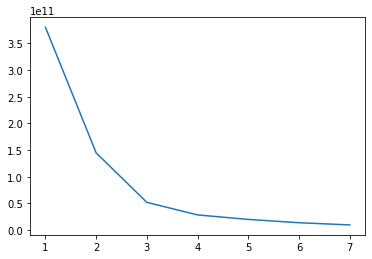

In [11]:
# plotting wcss graph to see the valiation of wcss 
plt.plot(range(1,k),wcss)

In [12]:
# after seeing above wcss curve we came to conclusion that 
# the optimal value of clusters should be 4 or 3 ,, i am taking 3 
cluster= train_or_predict(train,KMeans(n_clusters=3, random_state=0),1)

##### Determining output / dividing into classes.....(3 output classes) 

In [13]:
# clustering train set
predicted_train = train_or_predict(train,cluster)

In [14]:
# clustering test set
predicted_test = train_or_predict(test,cluster)

In [15]:
# /looking at clustered output value
predicted_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [16]:
# looking at clusterd output value
predicted_train

array([1, 1, 2, ..., 1, 2, 2], dtype=int32)

In [17]:
# checking number of elemets in each cluster of train clusters
cluster_elements(predicted_train)

elements in cluster  0   is  :  1369
elements in cluster  1   is  :  3922
elements in cluster  2   is  :  562


In [18]:
# checking number of elemets in each cluster of test clusters
cluster_elements(predicted_test)

elements in cluster  0   is  :  453
elements in cluster  1   is  :  1337
elements in cluster  2   is  :  161
